In [1]:
import zipfile
import os

zip_file_path = '/content/data.zip'

destination_folder = '/content/dataset'

os.makedirs(destination_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Dataset unzipped successfully to: {destination_folder}")

Dataset unzipped successfully to: /content/dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

# Step 1: Load the Pre-trained FaceNet Model
def load_facenet_model():
    # Load a pre-trained FaceNet model; assume available weights
    base_model = tf.keras.applications.InceptionResNetV2(include_top=False, input_shape=(160, 160, 3), pooling='avg')
    return base_model

base_model = load_facenet_model()

# Step 2: Customize the Model
x = base_model.output
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
embeddings = Dense(64, activation='relu', name='embedding')(x)  # Final embedding layer
output = Dense(2, activation='softmax')(embeddings)  # Adjust num_classes to match your dataset

# Build the fine-tuned model
model = Model(inputs=base_model.input, outputs=output)

# Step 3: Freeze Base Layers
for layer in base_model.layers[:-5]:  # Freeze all but last 5 layers
    layer.trainable = False

# Step 4: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Data Augmentation (Optional)
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    fill_mode='nearest',
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# Step 6: Prepare the Data Generators
train_data = datagen.flow_from_directory('/content/dataset/train_data', target_size=(160, 160), batch_size=32, class_mode='categorical')
val_data = datagen.flow_from_directory('/content/dataset/val_data', target_size=(160, 160), batch_size=32, class_mode='categorical')

# Step 7: Set up ModelCheckpoint Callback
checkpoint_callback = ModelCheckpoint(
    'best_model.keras',  # Filepath to save the model
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model based on the metric
    mode='max',  # Save the model with maximum validation accuracy
    verbose=1  # Print message when saving the model
)

# Step 8: Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=8,
    callbacks=[checkpoint_callback]  # Include the callback here
)

# The model with the highest validation accuracy will be saved as 'best_model.h5'.

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Found 1512 images belonging to 2 classes.
Found 138 images belonging to 2 classes.
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6696 - loss: 0.6342
Epoch 1: val_accuracy improved from -inf to 0.68841, saving model to best_model.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 242s 5s/step - accuracy: 0.6718 - loss: 0.6314 - val_accuracy: 0.6884 - val_loss: 0.5460
Epoch 2/8
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9285 - loss: 0.2356
Epoch 2: val_accuracy did not improve from 0.68841
48/48 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.9289 - loss: 0.2348 - val_accuracy: 0.6667 - val_loss: 0.5376
Epoch 3/8
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9795 - loss: 0.1051
Epoch 3: val_accuracy improved from 0.68841 to 0.82609, saving model to best_model.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.9794 - loss: 0.1050 - val_accuracy: 0.8261 - val_loss: 0.3505
Epoch 4/8
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9922 - loss: 0.0663
Epoch 4: val_accuracy did not improve from 0.82609
48/48 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step - accuracy: 0.992

In [5]:
from tensorflow.keras.models import load_model

model = load_model('best_model (2).keras')



In [3]:
import cv2
import os

# Define video path
video_path = "video.mp4"
output_folder = "frames"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Cannot open video file.")
    exit()

# Get video details
fps = cap.get(cv2.CAP_PROP_FPS)  # Frames per second
frame_interval = int(fps * 3)  # Frame interval for every 3 seconds

frame_count = 0
saved_frame_count = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break  # Exit loop when video ends

    # Save frame every 3 seconds
    if frame_count % frame_interval == 0:
        frame_filename = os.path.join(output_folder, f"_{saved_frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        saved_frame_count += 1
        print(f"Saved {frame_filename}")

    frame_count += 1

cap.release()
print(f"Total frames saved: {saved_frame_count}")


Saved frames/_0000.jpg
Saved frames/_0001.jpg
Saved frames/_0002.jpg
Saved frames/_0003.jpg
Saved frames/_0004.jpg
Saved frames/_0005.jpg
Saved frames/_0006.jpg
Saved frames/_0007.jpg
Saved frames/_0008.jpg
Saved frames/_0009.jpg
Saved frames/_0010.jpg
Total frames saved: 11


In [4]:
class_label={0:"Ayan", 1:"Vinay"}
attention_score={
    "happy": 1.0,
    "neutral":1.0,
    "surprise": 0.8,
    "angry": 0.5,
    "fear": 0.4,
    "sad": 0.2,
    "disgust": 0.2
}

In [25]:
def calculate_attention(last_scores, current_score):
    n=len(last_scores)
    score=current_score
    total=0
    weight=0.8
    for i in range(n):
      total+=weight
      score=score+last_scores[n-i-1][1]*weight
      weight-=0.2
    return score/(1+total)

In [7]:
pip install DeepFace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=ea3c58895b74f23d527fd54b9b8413bce096736f6fa5f1c599cc5189832face3
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 79, 79, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 79, 79, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 79, 79, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 77, 77, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 77, 77, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 77, 77, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 77, 77, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 77, 77, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 77, 77, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 38, 38, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 38, 38, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 38, 38, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 38, 38, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 36, 36, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 36, 36, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 61,959,720 (236.36 MB)

 Trainable params: 3,606,466 (13.76 MB)

 Non-trainable params: 51,140,320 (195.08 MB)

 Optimizer params: 7,212,934 (27.52 MB)

In [ ]:
import cv2

# Load the image
image = cv2.imread('/content/frames/_0007.jpg')

# Get the dimensions (height, width, channels)
height, width, channels = image.shape

print(f"Height: {height}, Width: {width}, Channels: {channels}")


Height: 272, Width: 480, Channels: 3


In [1]:
pip install fer

In [26]:
from fer import FER
import os
import cv2  # OpenCV for image processing
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace

detector = FER()

# Path to the folder containing images
folder_path = "/content/frames"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

def preprocess_face(face_img, input_size=(160,160)):
    # Resize image to model's input size
    face_img = cv2.resize(face_img, input_size)
    # Normalize the image (assumes model expects pixel values between 0 and 1)
    face_img = face_img.astype("float32") / 255.0
    # Add batch dimension (model expects 4D input: [batch, height, width, channels])
    face_img = np.expand_dims(face_img, axis=0)
    return face_img

attention_level={"Ayan":[[0, 0]], "Vinay":[[0, 0]]}

output_folder = "faces"
# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each image
for image_file in image_files[::-1]:
    image_path = str(os.path.join(folder_path, image_file))  # Full path to the image
    print(f"Processing: {image_file}")

    # Load the image
    image = cv2.imread(image_path)

    detector_backend = 'opencv'
    detections = DeepFace.extract_faces(img_path=image_path, detector_backend=detector_backend, enforce_detection=False)

    for face_num, face in enumerate(detections):
        facial_area = face['facial_area']
        x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
        face_img = image[y:y+h, x:x+w]
        processed_face = preprocess_face(face_img)

    # Predict the person's identity
        predictions = model.predict(processed_face)
        predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the class index
        predicted_person = class_label[predicted_class_index]
        instances=len(attention_level[predicted_person])

        # cv2.imwrite(os.path.join(output_folder, f"{image_file}_{predicted_person}.jpg"), face_img)
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

        # try:
        #   analysis = DeepFace.analyze(face_img, actions=["emotion"], enforce_detection=True)
        #   emotion = analysis["dominant_emotion"]
        #   attention_level[predicted_person].append([image_file, calculate_attention(attention_level[-1*instances+1:], attention_score[emotion])])
        # except Exception as e:
        #   attention_level[predicted_person].append([image_file, attention_level[predicted_person][-1][1]])

        result = detector.top_emotion(face_img)
        print(result[0])
        print(predicted_person)
        if result:
          attention_level[predicted_person].append( [image_file, calculate_attention(attention_level[predicted_person][max(-1*instances+1, -5):], attention_score[result[0]])] )
        else:
          attention_level[predicted_person].append([image_file, attention_level[predicted_person][-1][1]])



Processing: _0007.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
neutral
Vinay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
neutral
Ayan
Processing: _0008.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
neutral
Vinay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
angry
Ayan
Processing: _0004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
neutral
Vinay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
angry
Ayan
Processing: _0000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
neutral
Vinay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
sad
Ayan
Processing: _0009.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
neutral
Ayan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
neutral
Vinay
Processing: _0002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
neutral
Vinay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
neutral
Ayan
Processing: _0003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
neutral
Vinay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
neutral
Ayan
Processing: _0001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
neutral
Vinay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
neutr

In [33]:
for person in attention_level:
  attention_level[person]=attention_level[person][1:]
  attention_level[person].sort()

In [34]:
print(attention_level['Ayan'])

[['_0000.jpg', 0.41240446796002356], ['_0001.jpg', 0.7843002620100012], ['_0002.jpg', 0.6950035926579136], ['_0003.jpg', 0.7394083654495177], ['_0004.jpg', 0.522119341563786], ['_0005.jpg', 0.8266773960608986], ['_0006.jpg', 0.8555620462553697], ['_0007.jpg', 0.5555555555555556], ['_0008.jpg', 0.5246913580246914], ['_0009.jpg', 0.6547276112090927], ['_0010.jpg', 0.8806859508449131]]


In [38]:
print(attention_level['Vinay'])

[['_0000.jpg', 0.8436213991769547], ['_0001.jpg', 0.9279654524208706], ['_0002.jpg', 0.896479195244627], ['_0003.jpg', 0.9131351928059747], ['_0004.jpg', 0.823045267489712], ['_0005.jpg', 0.9407444529119883], ['_0006.jpg', 0.9513082499844762], ['_0007.jpg', 0.5555555555555556], ['_0008.jpg', 0.8024691358024691], ['_0009.jpg', 0.8669410150891632], ['_0010.jpg', 0.9597688304214391]]


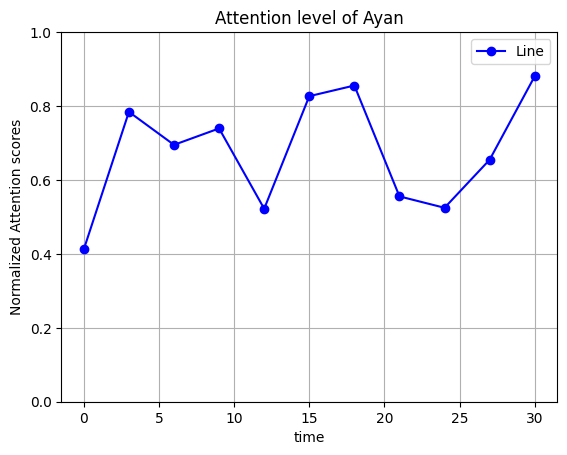

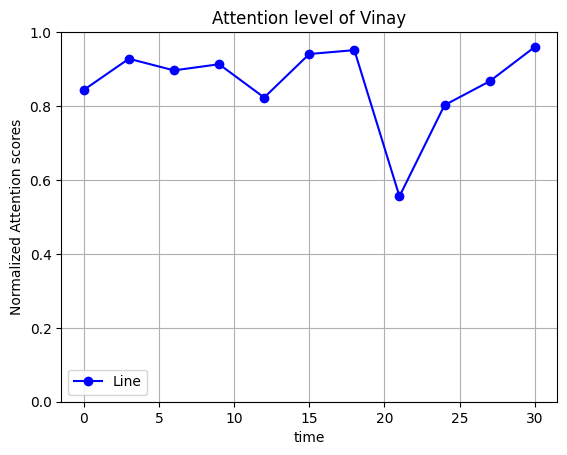

In [39]:
import matplotlib.pyplot as plt

for person in attention_level:
  x_values = [int(point[0][1:-4])*3 for point in attention_level[person]]
  y_values = [point[1] for point in attention_level[person]]

  # Create the plot
  plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Line')
  plt.ylim(0, 1)
  plt.xlabel('time')
  plt.ylabel('Normalized Attention scores')
  plt.title('Attention level of ' + person)

  # Show legend
  plt.legend()

  # Display the plot
  plt.grid()
  plt.show()